# Backpropagation
##### Author = Thomaskutty Reji 20122011
##### References = 'https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/'

## Definition
Backpropagation is a learning algorithm to do gradient descent. Predictions are compared with the actual value and then the derivative of cost is propagated back through chain rule, to  update each weight.

Consider the following neural network, 
<img src = "https://matthewmazur.files.wordpress.com/2018/03/neural_network-9.png"> 

## Forward pass 
Note : h1,h2, o1 and o2 nodes has sigmoid activation function 

In [1]:
import numpy as np 
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [6]:
# finding the output of the h1 node 
# neth1 = sumproduct(inputs,weights_to h1)
net_h1 = (0.15 * 0.05) +(0.2* 0.1) + (0.35*1)
out_h1 = sigmoid(net_h1)
print('sumproduct = ',net_h1)
print('after activation = ', out_h1)

sumproduct =  0.3775
after activation =  0.5932699921071872


Carrying out the same process for other nodes, we get 

    out_h2 = 0.59688
    out_o1 = 1.1059 
    out_o2 = 0.7729 

#### Calculating the total error 
    Etotal = sum(target-output)**2 
    
In the above network, we have two output nodes, so 

    Etotal = E_o1+E_o2 
  

## Backwards pass 

We consider the the case of w5, and how we going to update the weights using chain rule. We want to know the effect of change of w5 with respect to the total error (Etotal). 

The following diagram represents the above mentioned specific case

<img src ="https://matthewmazur.files.wordpress.com/2018/03/output_1_backprop-4.png"> 

 * We can see that Etotal is depended on out_o1, out_o2.
 * Now consider the case of out_o1, remember that we need to reach till w5. 
 * Again, out_o1 is further depended on w5,w6 and bias b2
 * Now we calculate the rate of change of Etotal with respect to w5 using the following chain
 
 <img src = "https://s0.wp.com/latex.php?latex=%5Cfrac%7B%5Cpartial+E_%7Btotal%7D%7D%7B%5Cpartial+w_%7B5%7D%7D+%3D+%5Cfrac%7B%5Cpartial+E_%7Btotal%7D%7D%7B%5Cpartial+out_%7Bo1%7D%7D+%2A+%5Cfrac%7B%5Cpartial+out_%7Bo1%7D%7D%7B%5Cpartial+net_%7Bo1%7D%7D+%2A+%5Cfrac%7B%5Cpartial+net_%7Bo1%7D%7D%7B%5Cpartial+w_%7B5%7D%7D&bg=ffffff&fg=404040&s=2&c=20201002&zoom=2">



Now we need to find E_total and its derivative with respect to out_o1

<img src="https://s0.wp.com/latex.php?latex=%5Cfrac%7B%5Cpartial+E_%7Btotal%7D%7D%7B%5Cpartial+out_%7Bo1%7D%7D+%3D+2+%2A+%5Cfrac%7B1%7D%7B2%7D%28target_%7Bo1%7D+-+out_%7Bo1%7D%29%5E%7B2+-+1%7D+%2A+-1+%2B+0&bg=ffffff&fg=404040&s=0&c=20201002&zoom=2">
<img src = "https://s0.wp.com/latex.php?latex=%5Cfrac%7B%5Cpartial+E_%7Btotal%7D%7D%7B%5Cpartial+out_%7Bo1%7D%7D+%3D+2+%2A+%5Cfrac%7B1%7D%7B2%7D%28target_%7Bo1%7D+-+out_%7Bo1%7D%29%5E%7B2+-+1%7D+%2A+-1+%2B+0&bg=ffffff&fg=404040&s=0&c=20201002&zoom=2">
<img src = "https://s0.wp.com/latex.php?latex=%5Cfrac%7B%5Cpartial+E_%7Btotal%7D%7D%7B%5Cpartial+out_%7Bo1%7D%7D+%3D+-%28target_%7Bo1%7D+-+out_%7Bo1%7D%29+%3D+-%280.01+-+0.75136507%29+%3D+0.74136507&bg=ffffff&fg=404040&s=0&c=20201002&zoom=2">

We get the out_o1 after applying the activation function to net_o1, so, the formula for the activation is sigmoid. 

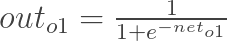

<img src = "https://s0.wp.com/latex.php?latex=%5Cfrac%7B%5Cpartial+out_%7Bo1%7D%7D%7B%5Cpartial+net_%7Bo1%7D%7D+%3D+out_%7Bo1%7D%281+-+out_%7Bo1%7D%29+%3D+0.75136507%281+-+0.75136507%29+%3D+0.186815602&bg=ffffff&fg=404040&s=0&c=20201002&zoom=2">

Finally, we need to find the rate of change of net_o3 with respect to the weight w5, Remember that net_o3 is a function of w5, out_h1, w6 and out_h2. So, 

<img src="https://s0.wp.com/latex.php?latex=net_%7Bo1%7D+%3D+w_5+%2A+out_%7Bh1%7D+%2B+w_6+%2A+out_%7Bh2%7D+%2B+b_2+%2A+1&bg=ffffff&fg=404040&s=0&c=20201002&zoom=2">
<img src="https://s0.wp.com/latex.php?latex=%5Cfrac%7B%5Cpartial+net_%7Bo1%7D%7D%7B%5Cpartial+w_%7B5%7D%7D+%3D+1+%2A+out_%7Bh1%7D+%2A+w_5%5E%7B%281+-+1%29%7D+%2B+0+%2B+0+%3D+out_%7Bh1%7D+%3D+0.593269992&bg=ffffff&fg=404040&s=0&c=20201002&zoom=2">


Now, we have everything for calculating the effect of w5 on the total error 

<img src="https://s0.wp.com/latex.php?latex=%5Cfrac%7B%5Cpartial+E_%7Btotal%7D%7D%7B%5Cpartial+w_%7B5%7D%7D+%3D+%5Cfrac%7B%5Cpartial+E_%7Btotal%7D%7D%7B%5Cpartial+out_%7Bo1%7D%7D+%2A+%5Cfrac%7B%5Cpartial+out_%7Bo1%7D%7D%7B%5Cpartial+net_%7Bo1%7D%7D+%2A+%5Cfrac%7B%5Cpartial+net_%7Bo1%7D%7D%7B%5Cpartial+w_%7B5%7D%7D&bg=ffffff&fg=404040&s=0&c=20201002&zoom=2"> 
<img src = "https://s0.wp.com/latex.php?latex=%5Cfrac%7B%5Cpartial+E_%7Btotal%7D%7D%7B%5Cpartial+w_%7B5%7D%7D+%3D+0.74136507+%2A+0.186815602+%2A+0.593269992+%3D+0.082167041&bg=ffffff&fg=404040&s=0&c=20201002&zoom=2"> 

### Weight updation formula 

The general weight updation rule is 

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRZTGJ1hJz_A--tZr42vHP4jvh6qkGqLP29Zw&usqp=CAU">

Here, alpha represents the learning rate and J(theta) represents the cost function

So, here we update the weight w5 as follows, 
<img src="https://s0.wp.com/latex.php?latex=w_5%5E%7B%2B%7D+%3D+w_5+-+%5Ceta+%2A+%5Cfrac%7B%5Cpartial+E_%7Btotal%7D%7D%7B%5Cpartial+w_%7B5%7D%7D+%3D+0.4+-+0.5+%2A+0.082167041+%3D+0.35891648&bg=ffffff&fg=404040&s=0&c=20201002&zoom=2">

### Repeating till convergence 
Finally, we’ve updated all of our weights! When we fed forward the 0.05 and 0.1 inputs originally, the error on the network was 0.298371109. But after repeating this process 10,000 times, for example, the error plummets to 0.0000351085.